In [1]:
!pip install latex

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for latex: filename=latex-0.7.0-py3-none-any.whl size=7588 sha256=4424a851e28997b7d059c67ab924014f4cc0ba0dd60c4e3a47855a3b5d4b84fb
  Stored in directory: /root/.cache/pip/wheels/7e/02/25/c00dfc203e8ba53dfc2e4e97d40e537263d6e03606681f3872
  Created wheel for data: filename=data-0.4-py3-none-any.whl size=7227 sha256=f6857ea96027df1e88278609983da17ee01940fef65282a009255eecfb3ac88f
  Stored in directory: /root/.cache/pip/wheels/d0/e8/fa/e253c256048ea58d99a8abb5e751abb6a838af6f12887b5418
  Created wheel for shutilwhich: filename=shutilwhich-1.1.0-py3-none-any.whl size=2766 sha256=39f300ee55a4f8a895fb98233df5b7fcd6b97294f59fc3e2617551f98bb64613
  Stored in directory: /root/.cache/pip/wheels/75/1f/1c/0ecab7ceabad0b8e018891505911e82a6f358a0291e7681bae
  Created wheel for tempdir: filename=tempdir-0.7.1-py3-none-any.w

In [2]:
!sudo apt install cm-super dvipng texlive-latex-extra texlive-latex-recommended

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  cm-super-minimal dvisvgm fonts-droid-fallback fonts-lato fonts-lmodern
  fonts-noto-mono fonts-texgyre fonts-urw-base35 ghostscript
  libapache-pom-java libcommons-logging-java libcommons-parent-java
  libfontbox-java libfontenc1 libgs9 libgs9-common libidn12 libijs-0.35
  libjbig2dec0 libkpathsea6 libpdfbox-java libptexenc1 libruby3.0 libsynctex2
  libteckit0 libtexlua53 libtexluajit2 libwoff1 libzzip-0-13 lmodern
  pfb2t1c2pfb poppler-data preview-latex-style rake ruby ruby-net-telnet
  ruby-rubygems ruby-webrick ruby-xmlrpc ruby3.0 rubygems-integration t1utils
  tex-common tex-gyre texlive-base texlive-binaries texlive-fonts-recommended
  texlive-latex-base texlive-pictures texlive-plain-generic tipa
  xfonts-encodings xfonts-utils
Suggested packages:
  fonts-noto fonts-freefont-otf | fonts-freefont-ttf ghostscript-x
  libavalon-fram

In [3]:
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpmath import exp
from mpl_toolkits.mplot3d import Axes3D

mpl.rcParams["text.usetex"] = True
mpl.rcParams['text.latex.preamble'] = r'\usepackage{{amsmath}}'

In [4]:
nano  = 10**(-9)
micro = 10**(-6)
mili  = 10**(-3)
cm = 10**(-2)

deltaRho0 = 60 * micro
l = 1064 * nano

c = 3.0 * (10**8)

a = deltaRho0/2
k0 = 2*math.pi / l

t = 1

#Figura Slide 90

$\Psi_{gauss}(\rho,z, t) = \frac{2a^2exp\left(\frac{-\rho^2}{4(a^2 + iz/2k_0)}\right)}{2(a^2 + iz/2k_0)} e^{ik_0(z-ct)}$



In [5]:
def psiGauss(rho, z, t, a, k0, c):
    a2 = a**2
    i = 1j
    expCommon = (a2 + ((i*z)/(2*k0)))

    numFristTerm = 2 * a2

    exponentNum = -rho**2
    exponentDen = 4 * expCommon
    exponent = exponentNum/exponentDen

    numSecondTerm =  exp(exponent)

    num = numFristTerm * numSecondTerm

    den = 2 * expCommon

    fristTermEq = num/den

    expoentSecondExp = i * k0 * (z - c*t)
    secondExp = exp(expoentSecondExp)

    return abs(fristTermEq * secondExp)

In [6]:
p = np.linspace(-0.4*mili, 0.4*mili, 100)

resultsZ0 = []
resultsZ09 = []
resultsZ18 = []

t = 1

for i in p:
    resultsZ0.append (psiGauss(i, 0, t, a, k0, c))
    resultsZ09.append(psiGauss(i, 0.9*cm, t, a, k0, c))
    resultsZ18.append(psiGauss(i, 1.8*cm, t, a, k0, c))

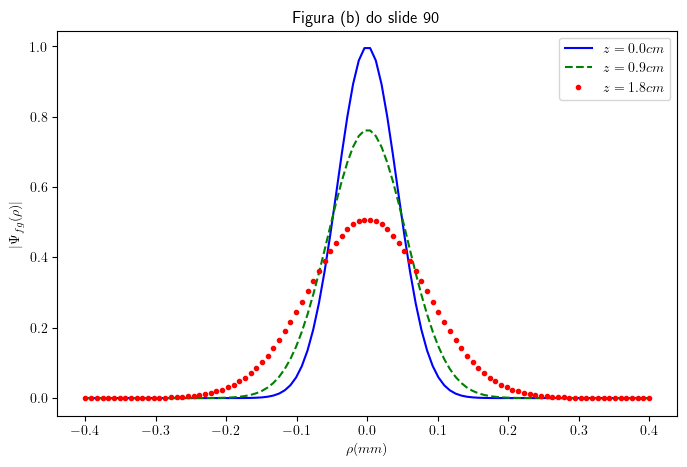

In [7]:
pToPrint = np.linspace(-0.4, 0.4, 100)

plt.figure(figsize=[8,5])
plt.plot(pToPrint, resultsZ0, 'b', label=r'$z = 0.0 cm$')
plt.plot(pToPrint, resultsZ09, 'g--', label=r'$z = 0.9 cm$')
plt.plot(pToPrint, resultsZ18, 'r.', label=r'$z = 1.8 cm$')
plt.title(r'Figura (b) do slide 90')
plt.xlabel(r'$\rho (mm)$')
plt.ylabel(r'$\mathopen|\Psi_{fg}(\rho)\mathclose|$')
plt.legend(loc='best')
plt.show()

In [8]:
qntPoints = 50
p = np.linspace(3*mili, -3*mili, qntPoints)
z = np.linspace(0, 1.25, qntPoints)

results = np.zeros((qntPoints,qntPoints))

for i_p in range(qntPoints):
    for j_z in range(qntPoints):
        results[i_p][j_z] = psiGauss(p[i_p], z[j_z], 1, a, k0, c)

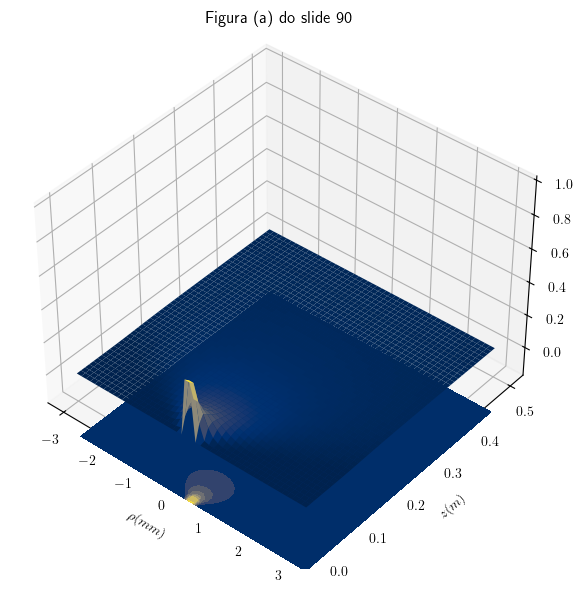

In [14]:
from matplotlib import cm

pToPrint = np.linspace(3, -3, qntPoints)
PToPrint, ZToPrint = np.meshgrid(pToPrint, z, indexing='ij')

fig = plt.figure(figsize=(12, 7))
fig3d = fig.add_subplot(projection='3d')

fig3d.plot_surface(PToPrint, ZToPrint, results, cmap=cm.cividis)
contournsFig3d = fig3d.contourf(PToPrint, ZToPrint, results, zdir='z', offset=-0.40, cmap=cm.cividis)

fig3d.set_zlim(-0.15,1)
fig3d.view_init(40, -50)

fig3d.set_xlabel(r'$\rho (mm)$')
fig3d.set_ylabel(r'$z (m)$')
plt.title(r'Figura (a) do slide 90')

plt.show()

#Figura do Slide 92
$\Psi(\rho, z, t)=\frac{2a^2exp\left(\frac{-\rho^2}{4(a^2 + iz/2k_0)}\right)exp{\left(\frac{-(z-ct)^2}{4c^2b^2}\right) }}{2(a^2 + iz/2k_0)} $

In [10]:
def psiGaussCT(rho, z, a, k0, ct, c, b):
    a2 = a**2
    i = 1j
    expCommon = (a2 + ((i*z)/(2*k0)))

    exponentNum = -(rho**2)
    exponentDen = 4 * expCommon
    exponent = exponentNum/exponentDen

    frist_exp =  exp(exponent)

    expoentNumSec = -((z - ct)**2)
    expoentDenSec = 4 * (c**2) * (b**2)
    exponentSec = expoentNumSec/expoentDenSec

    second_exp = exp(exponentSec)

    num =  a2 * frist_exp * second_exp

    return abs(num/expCommon)

In [11]:
nano = 10**(-9)
micro = 10**(-6)
mili = 10**(-3)
cm = 10**(-2)

deltaRho0 = 60 * micro
l = 1064 * nano
c = 3 * (10**8)
a = deltaRho0/2
k0 = 2*math.pi / l

ct = np.array([0, 0.09, 0.18, 0.27])

In [12]:
qntPoints = 50

p = np.linspace(3*mili, -3*mili, qntPoints)
z = np.linspace(0, 0.5, qntPoints)

results_a = np.zeros((qntPoints,qntPoints))
results_b = np.zeros((qntPoints,qntPoints))
results_c = np.zeros((qntPoints,qntPoints))
results_d = np.zeros((qntPoints,qntPoints))


for i_p in range(qntPoints):
    for j_z in range(qntPoints):
        results_a[i_p][j_z] = psiGaussCT(p[i_p], z[j_z], a, k0, 0, c, 0.0000000001)
        results_b[i_p][j_z] = psiGaussCT(p[i_p], z[j_z], a, k0, 0.09, c, 0.0000000001)
        results_c[i_p][j_z] = psiGaussCT(p[i_p], z[j_z], a, k0, 0.18, c, 0.0000000001)
        results_d[i_p][j_z] = psiGaussCT(p[i_p], z[j_z], a, k0, 0.27, c, 0.0000000001)


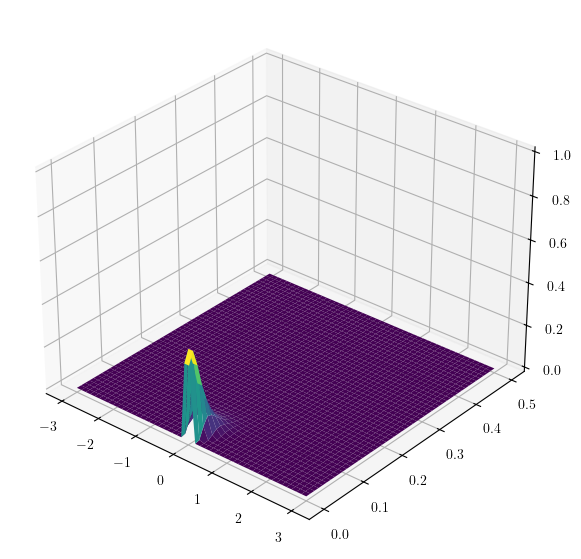

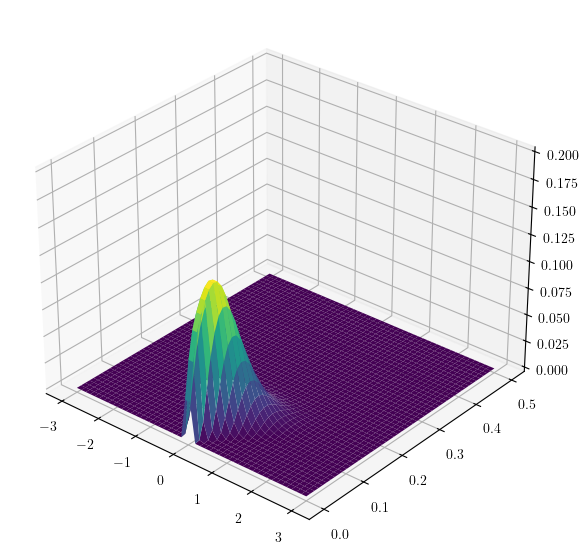

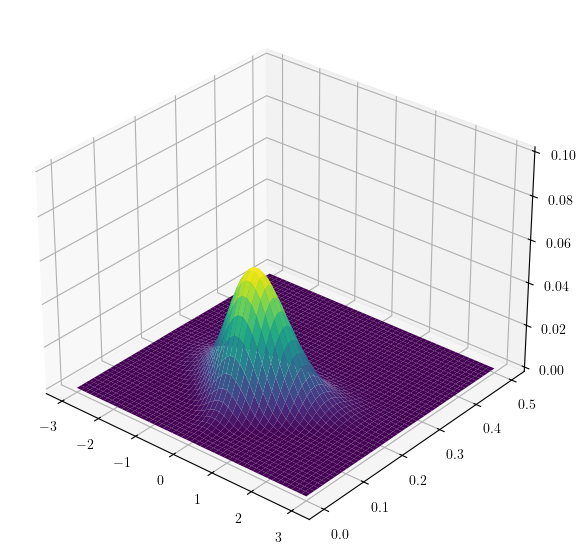

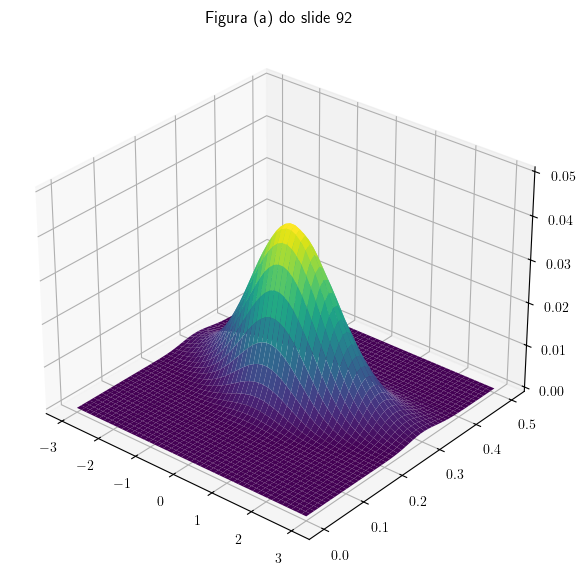

In [13]:

from matplotlib import cm
pToPrint = np.linspace(3, -3, qntPoints)
PToPrint, ZToPrint = np.meshgrid(pToPrint, z, indexing='ij')

fig_a = plt.figure(figsize=(12, 7))
fig3d_a = fig_a.add_subplot(projection='3d')
fig3d_a.plot_surface(PToPrint, ZToPrint, results_a, cmap=cm.viridis)
fig3d_a.set_zlim(0,1)
fig3d_a.view_init(30, -50)

fig_b = plt.figure(figsize=(12, 7))
fig3d_b = fig_b.add_subplot(projection='3d')
fig3d_b.plot_surface(PToPrint, ZToPrint, results_b, cmap=cm.viridis)
fig3d_b.set_zlim(0,0.2)
fig3d_b.view_init(30, -50)

fig_c = plt.figure(figsize=(12, 7))
fig3d_c = fig_c.add_subplot(projection='3d')
fig3d_c.plot_surface(PToPrint, ZToPrint, results_c, cmap=cm.viridis)
fig3d_c.set_zlim(0,0.1)
fig3d_c.view_init(30, -50)

fig_d = plt.figure(figsize=(12, 7))
fig3d_d = fig_d.add_subplot(projection='3d')
fig3d_d.plot_surface(PToPrint, ZToPrint, results_d, cmap=cm.viridis)
fig3d_d.set_zlim(0,0.05)
fig3d_d.view_init(30, -50)

plt.title("Figura (a) do slide 92")


plt.show()
